In [238]:
import torch
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# **Load  the Data**

In [239]:
from keras.datasets import fashion_mnist

In [240]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [241]:
print('X_train: ' + str(train_X.shape))
print('X_test: ' + str(test_X.shape))

X_train: (60000, 28, 28)
X_test: (10000, 28, 28)


In [242]:
train = train_X[0:1000]
test = train_X[1000:4000]

In [243]:
train = np.reshape(train, (train.shape[0], -1))
test = np.reshape(test, (test.shape[0], -1))

In [244]:
train_set = train.astype('float32') / 255.0
test_set = test.astype('float32') / 255.0

In [245]:
def find_neuron_neighbors(neuron_index, neurons_square_edge, r):
  
  x_index = int(np.floor(neuron_index /neurons_square_edge))
  y_index = (neuron_index % neurons_square_edge)
  x = np.arange(max(0, x_index - r ),min(neurons_square_edge, x_index + r + 1))
  y = np.arange(max(0, y_index - r ),min(neurons_square_edge, y_index + r + 1))
  res = []
  for xx in x:
    for yy in y:
      res.append((xx*neurons_square_edge )+yy)
  return res

In [221]:
def Plott(w):
  plt.figure(figsize=(20, 30))
  for i in range(225):
      ax = plt.subplot(15, 15, i + 1)
      ax.imshow(w[:,i].reshape([28, 28]), cmap='gray')
    
  plt.tight_layout()

In [225]:
def train_(ttrain_s,r):
  neurons_square_edge = 15
  n_neurons = 225
  n_inputs = 784
  r = r
  initial_lr = 0.5
  decay_factor = 0.2
  epochs = 10
  D= [0]*n_neurons
  neighbors =[]
  w_list =[]
  w = np.random.randn(n_inputs, n_neurons)
  for epoch in range(epochs):
    #print("======================================")
    print("epoch :", epoch)
    #print("w :" ,w)
    for i in range(train.shape[0]):
      for j in range(n_neurons):

        D[j] = np.sum(np.power( w[:,j]-train[i,:],2))
      
      min_neuron_index = [i for i, element in enumerate(D) if element == np.min(D)]
      neighbors = find_neuron_neighbors(min_neuron_index[0], neurons_square_edge, r)
      w_old = np.copy(w)
      #print("neighbors :",neighbors)
      for k in neighbors:
        w[:,k]  = w_old[:,k] + (initial_lr* (train[i]-w_old[:,k]))


    initial_lr = initial_lr * np.exp(-epoch * decay_factor)
    if epoch in [0,1,4,9]:
      w_list.append(w)

  return w_list 

In [226]:
w_list_1 =train_(train_set,1)

epoch : 0
epoch : 1
epoch : 2
epoch : 3
epoch : 4
epoch : 5
epoch : 6
epoch : 7
epoch : 8
epoch : 9


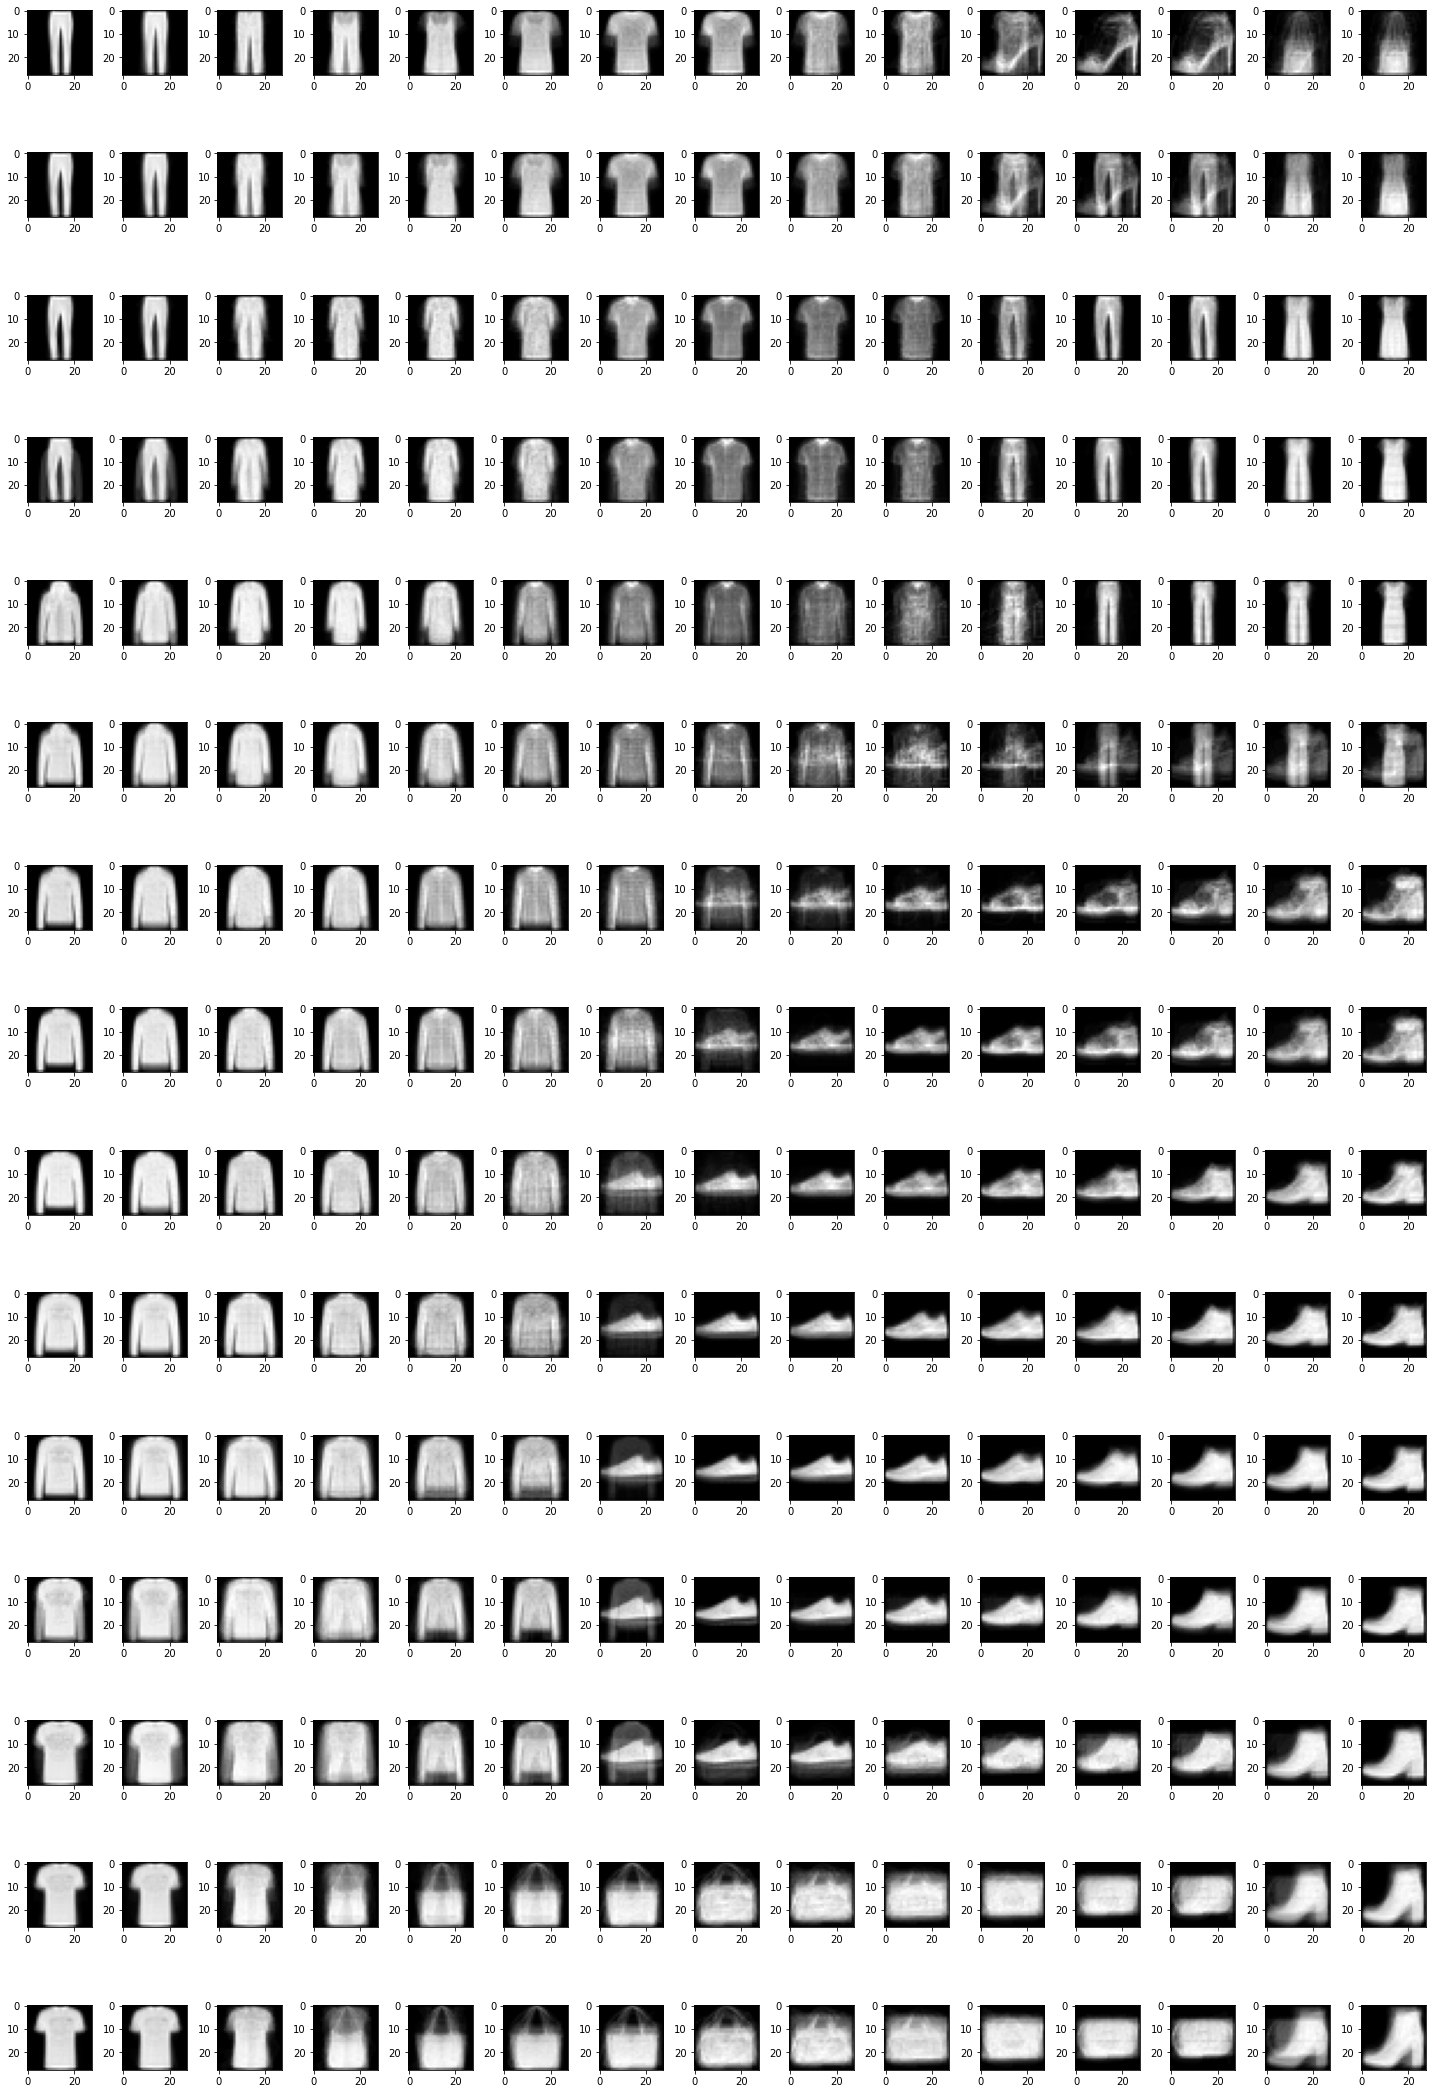

In [228]:
Plott(w_list_1[0])

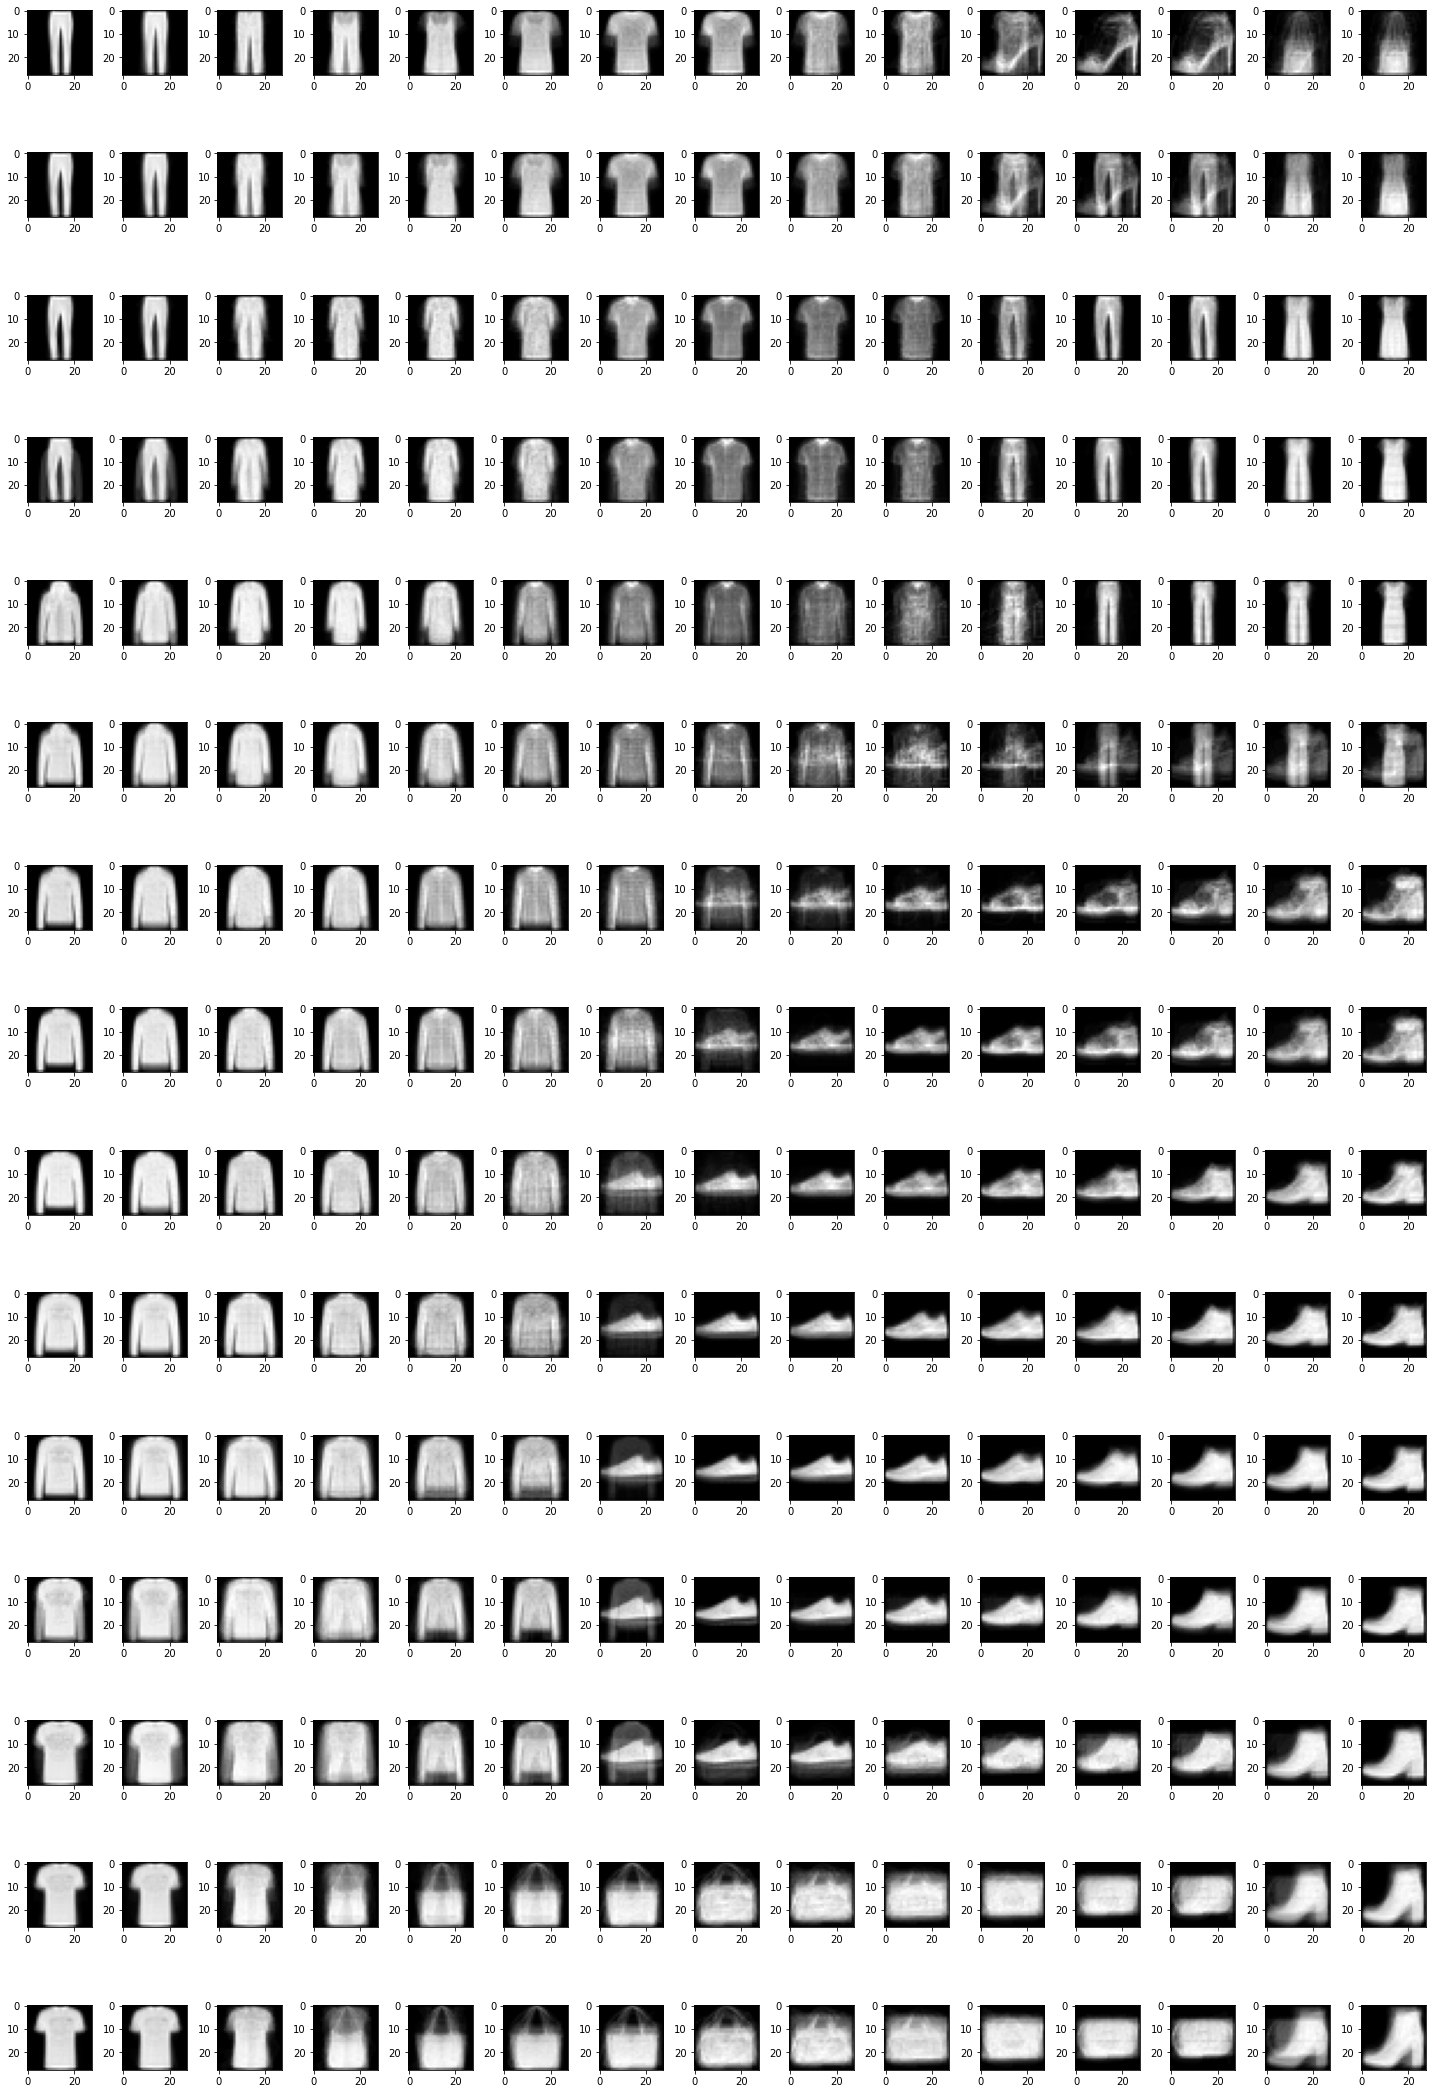

In [229]:
Plott(w_list_1[1])

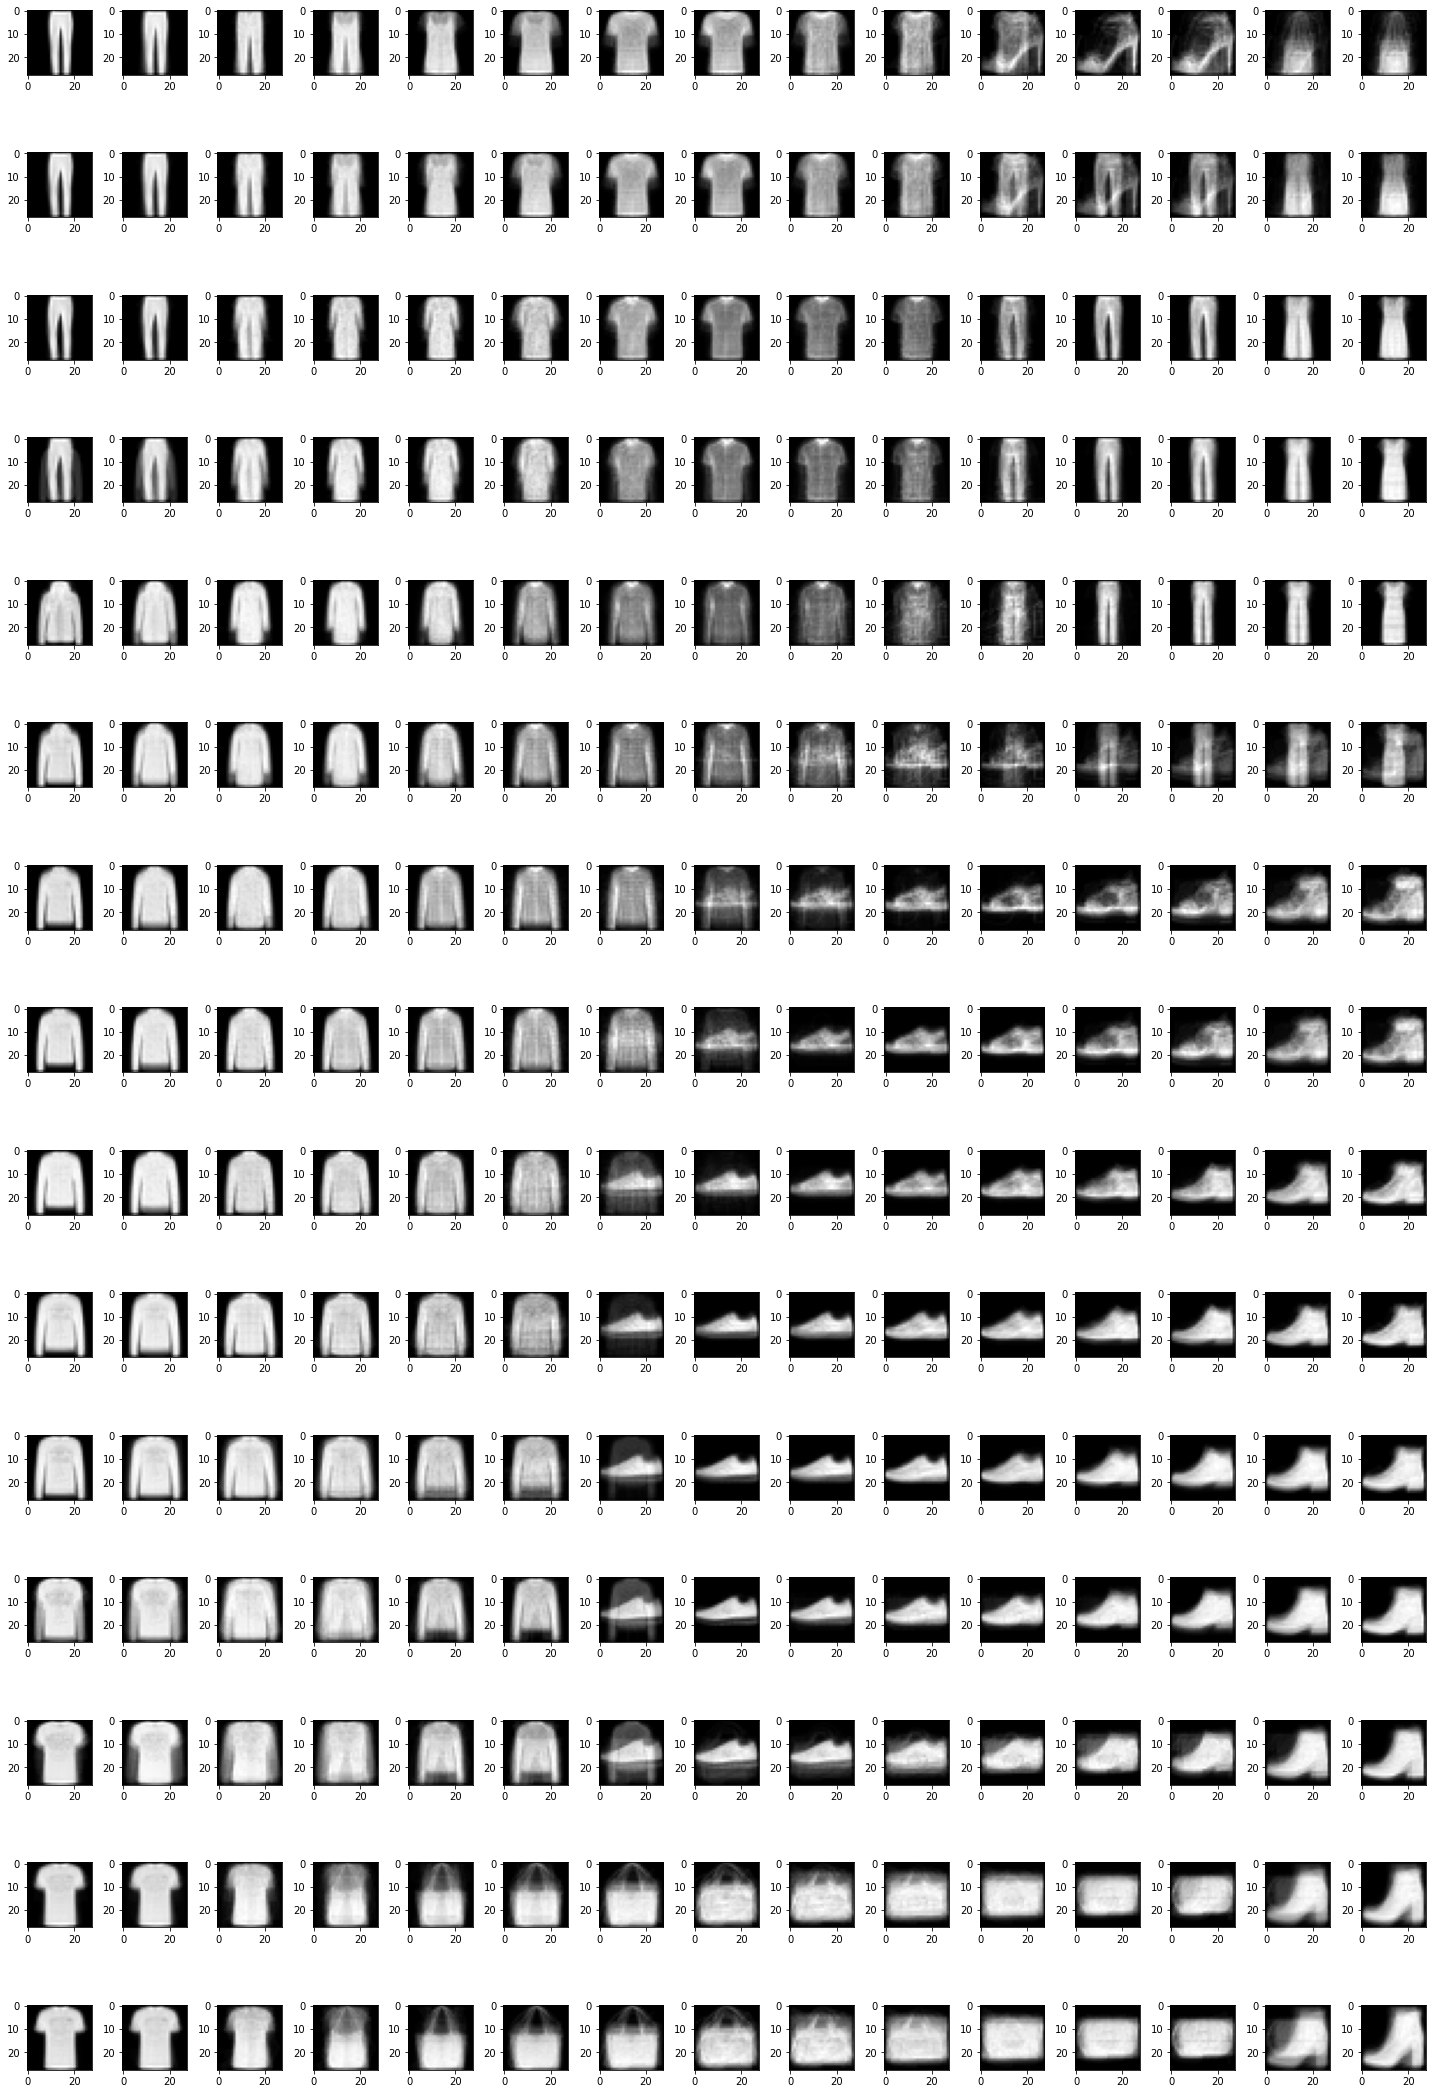

In [230]:
Plott(w_list_1[2])

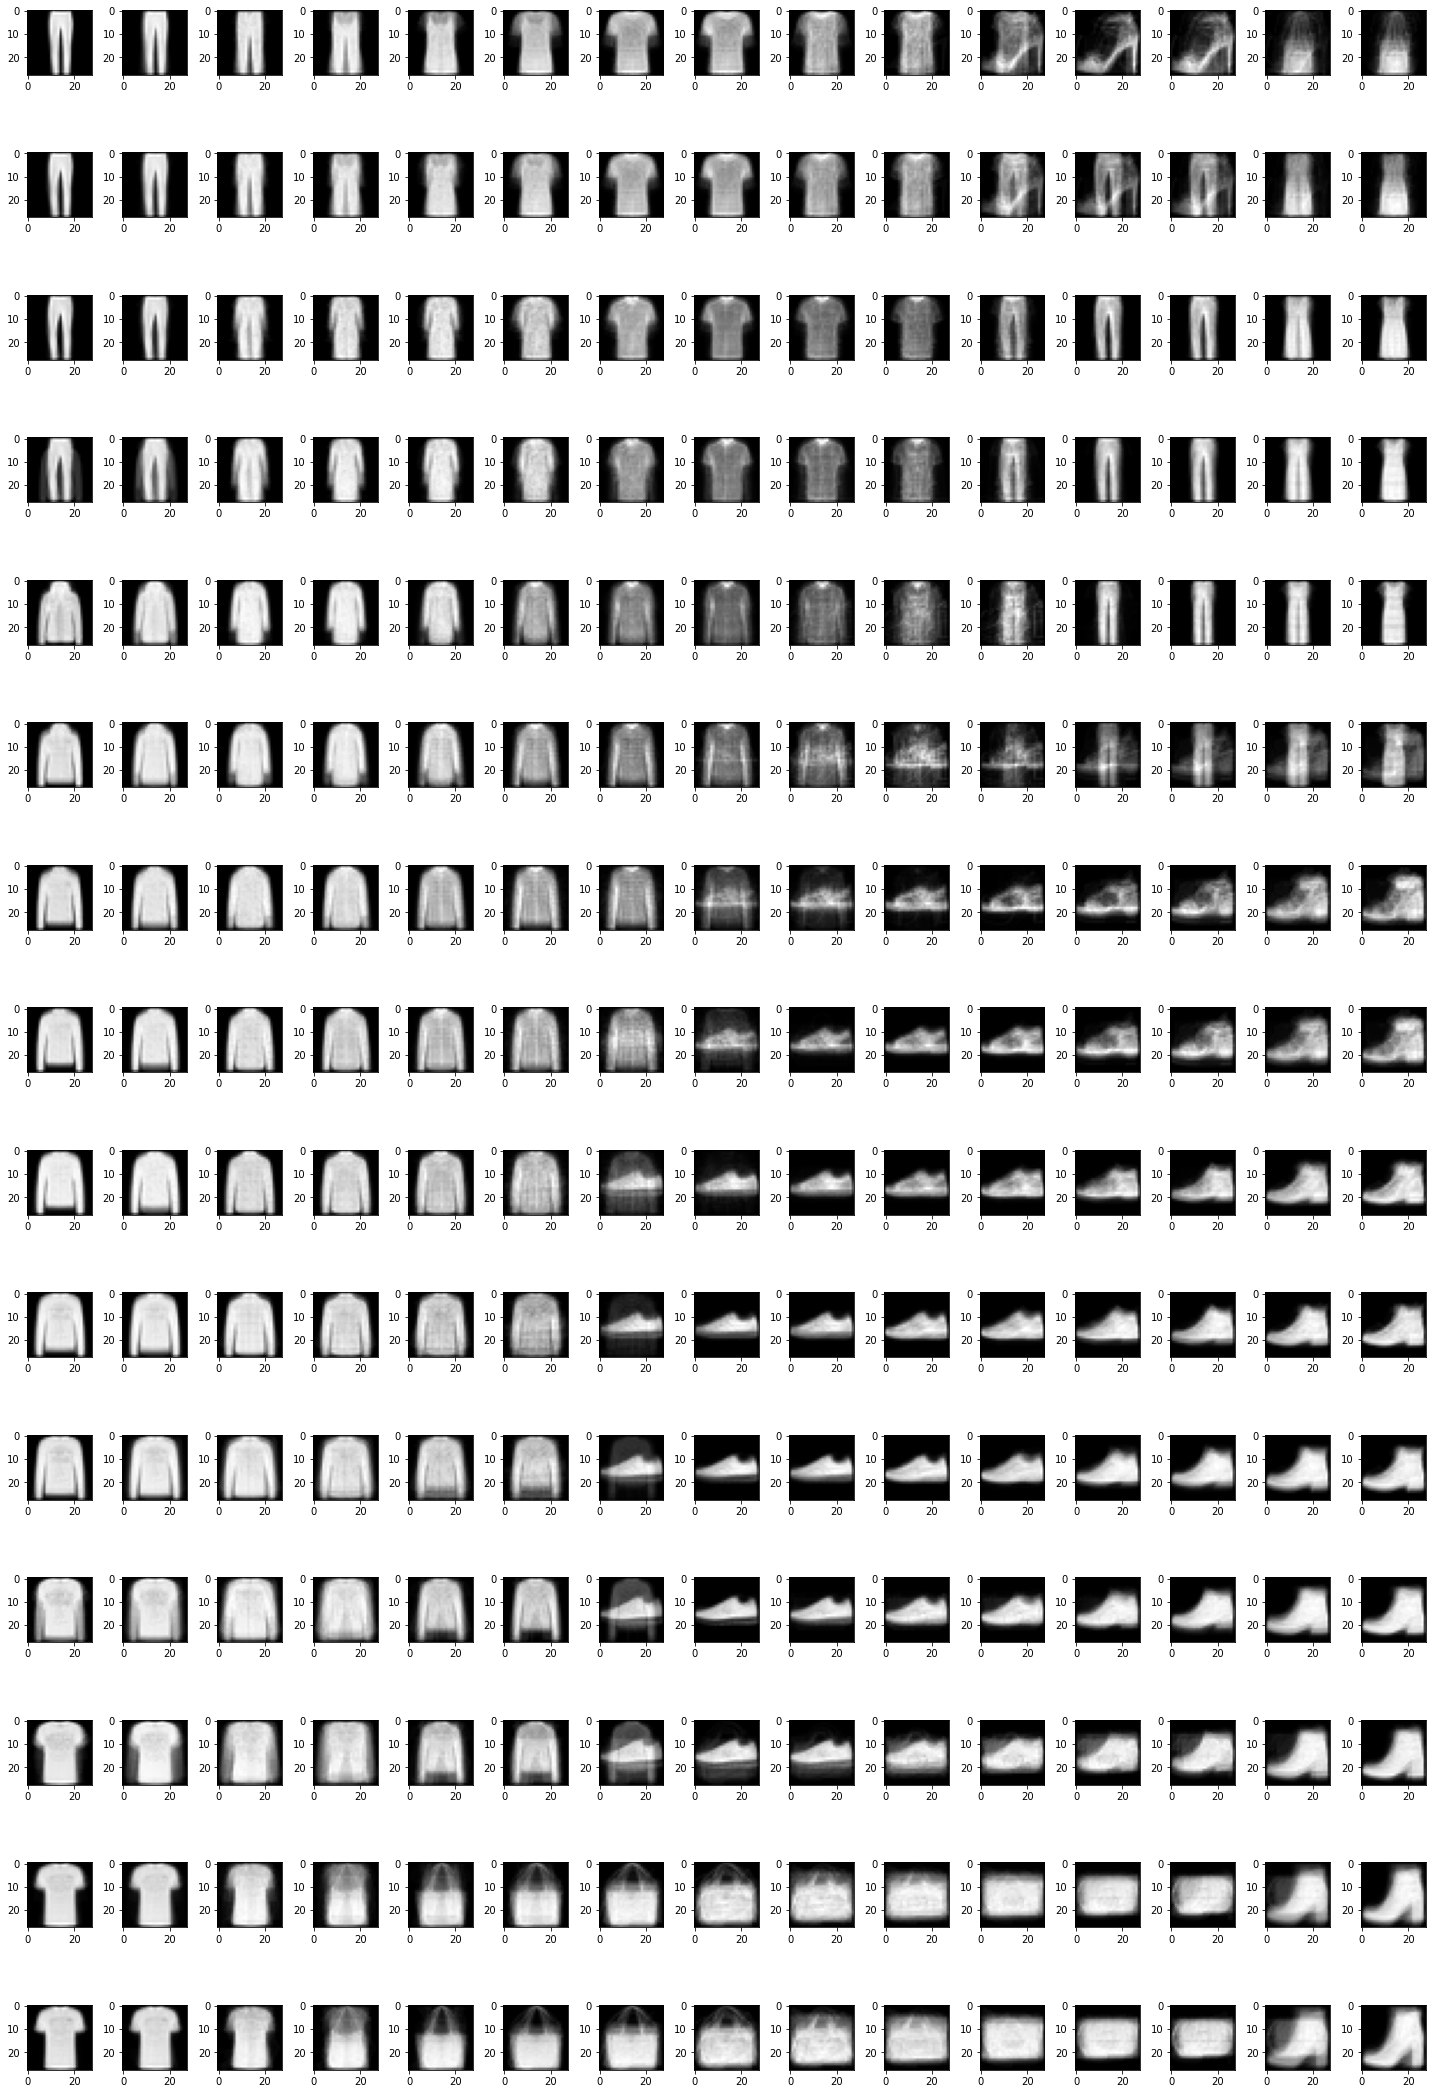

In [227]:
Plott(w_list_1[3])

#پ

In [246]:
def train_(ttrain_s,r):
  neurons_square_edge = 15
  n_neurons = 225
  n_inputs = 784
  r = r
  initial_lr = 0.5
  decay_factor = 0.2
  epochs = 10
  D= [0]*n_neurons
  neighbors =[]
  w_list =[]
  w = np.random.randn(n_inputs, n_neurons)
  for epoch in range(epochs):
    #print("======================================")
    print("epoch :", epoch)
    #print("w :" ,w)
    for i in range(train.shape[0]):
      for j in range(n_neurons):

        D[j] = np.sum(np.power( w[:,j]-train[i,:],2))
      
      min_neuron_index = [i for i, element in enumerate(D) if element == np.min(D)]
      neighbors = find_neuron_neighbors(min_neuron_index[0], neurons_square_edge, r)
      w_old = np.copy(w)
      #print("neighbors :",neighbors)
      for k in neighbors:
        w[:,k]  = w_old[:,k] + (initial_lr* (train[i]-w_old[:,k]))


    initial_lr = initial_lr * np.exp(-epoch * decay_factor)
    if r>0 :
      r= r-1
    if epoch in [0,1,4,9]:
      w_list.append(w)

  return w_list 

In [247]:
w_list_2 =train_(train_set,3)

epoch : 0
epoch : 1
epoch : 2
epoch : 3
epoch : 4
epoch : 5
epoch : 6
epoch : 7
epoch : 8
epoch : 9


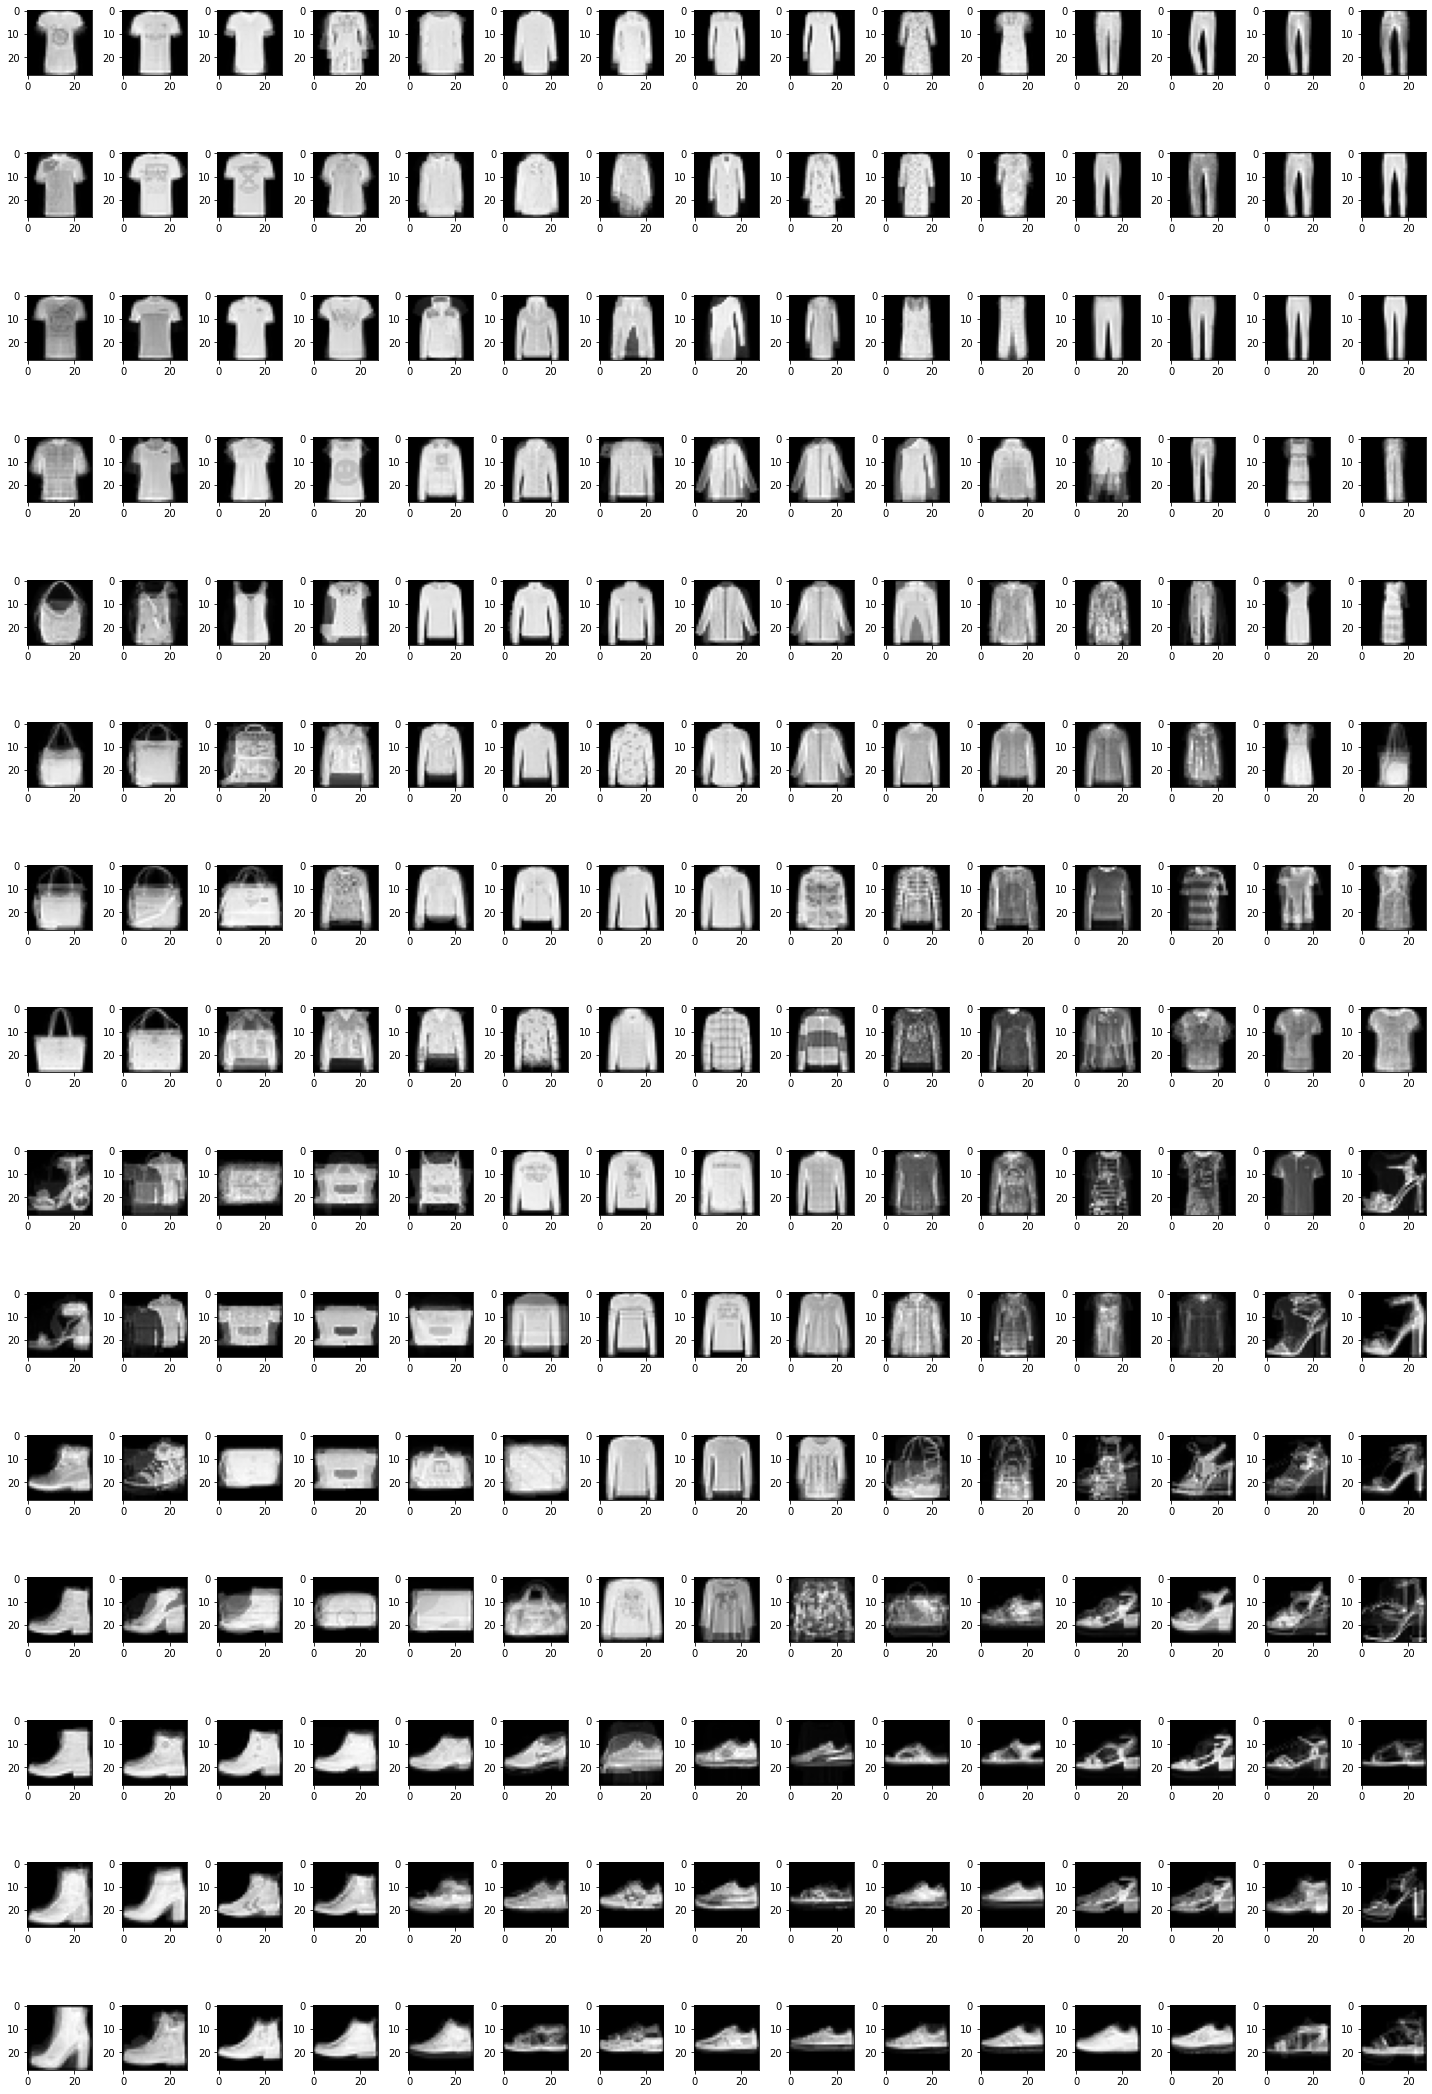

In [248]:
Plott(w_list_2[0])

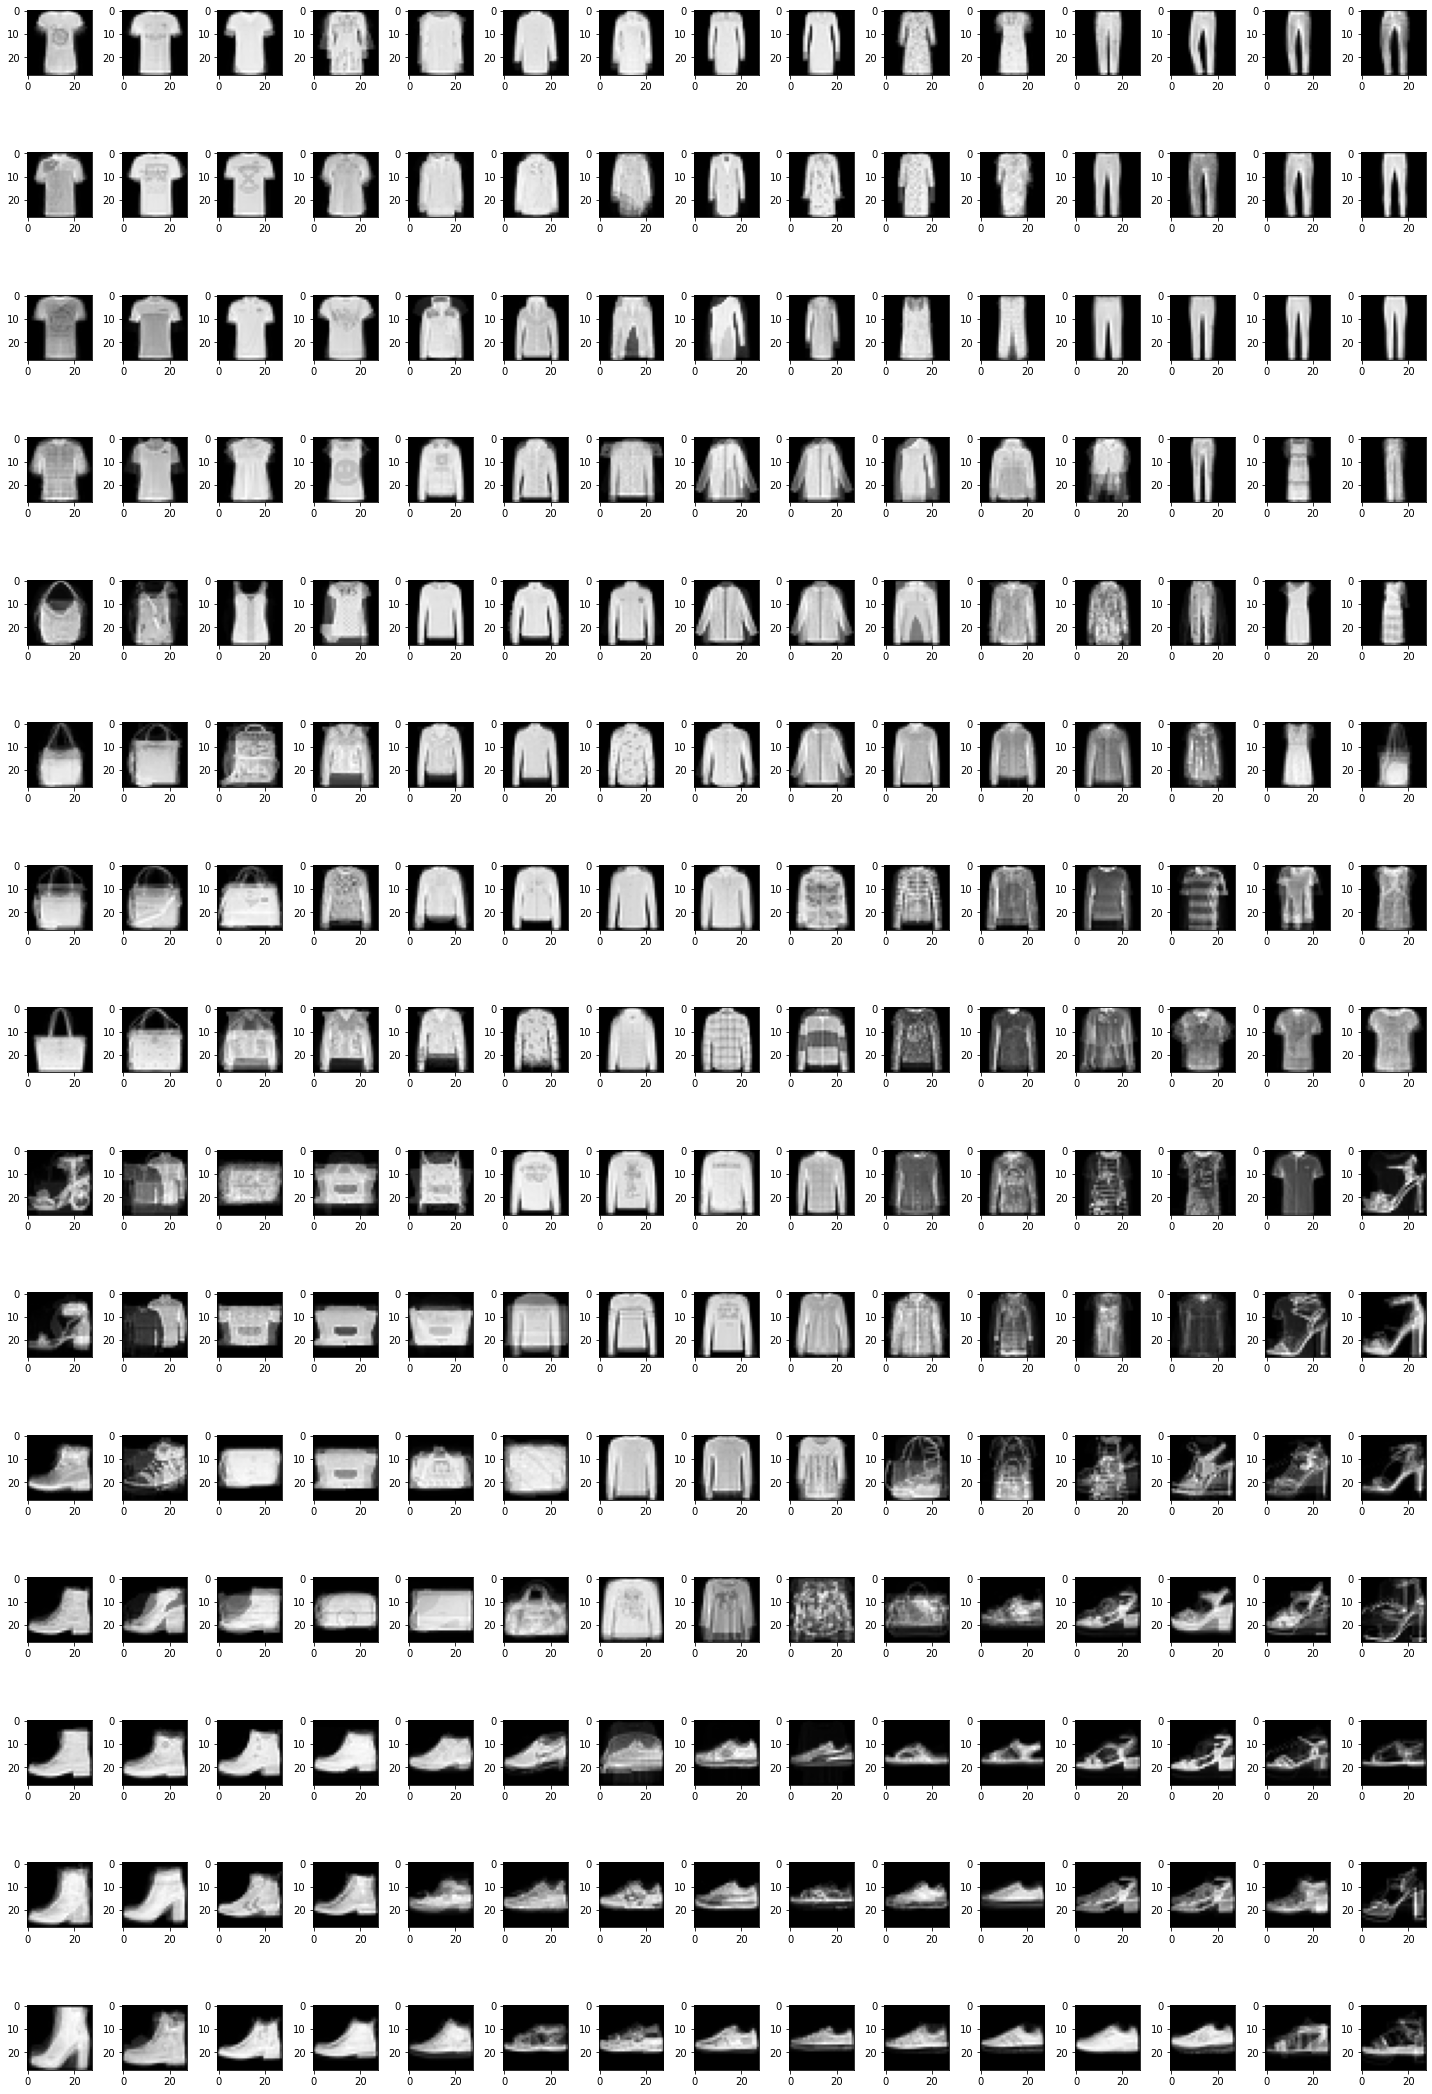

In [249]:
Plott(w_list_2[1])

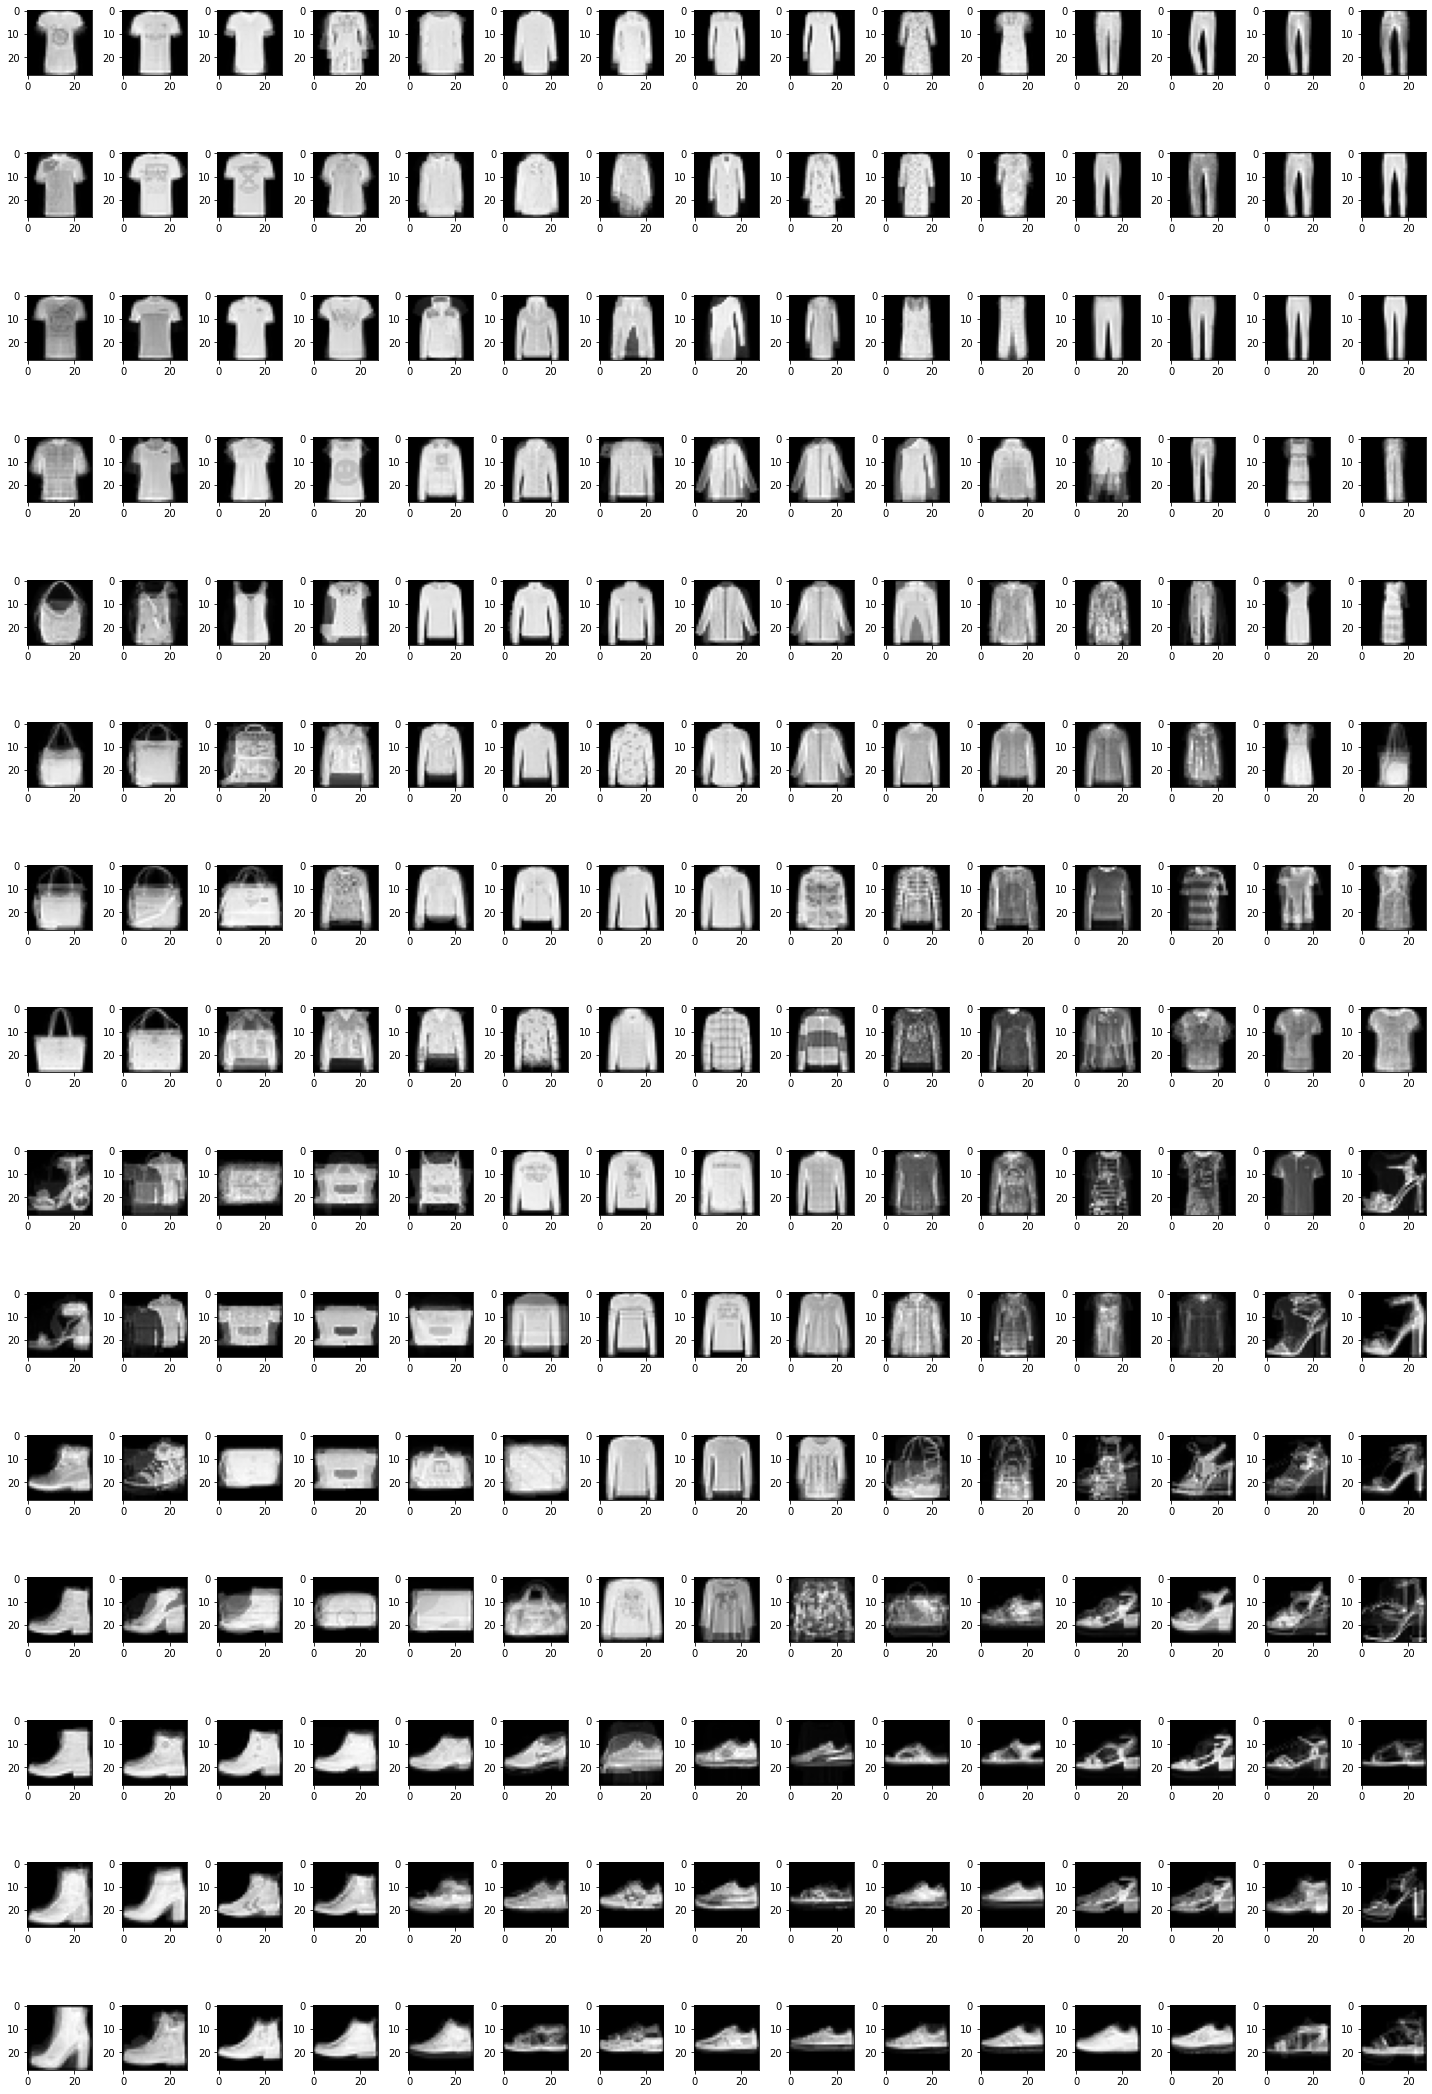

In [250]:
Plott(w_list_2[2])

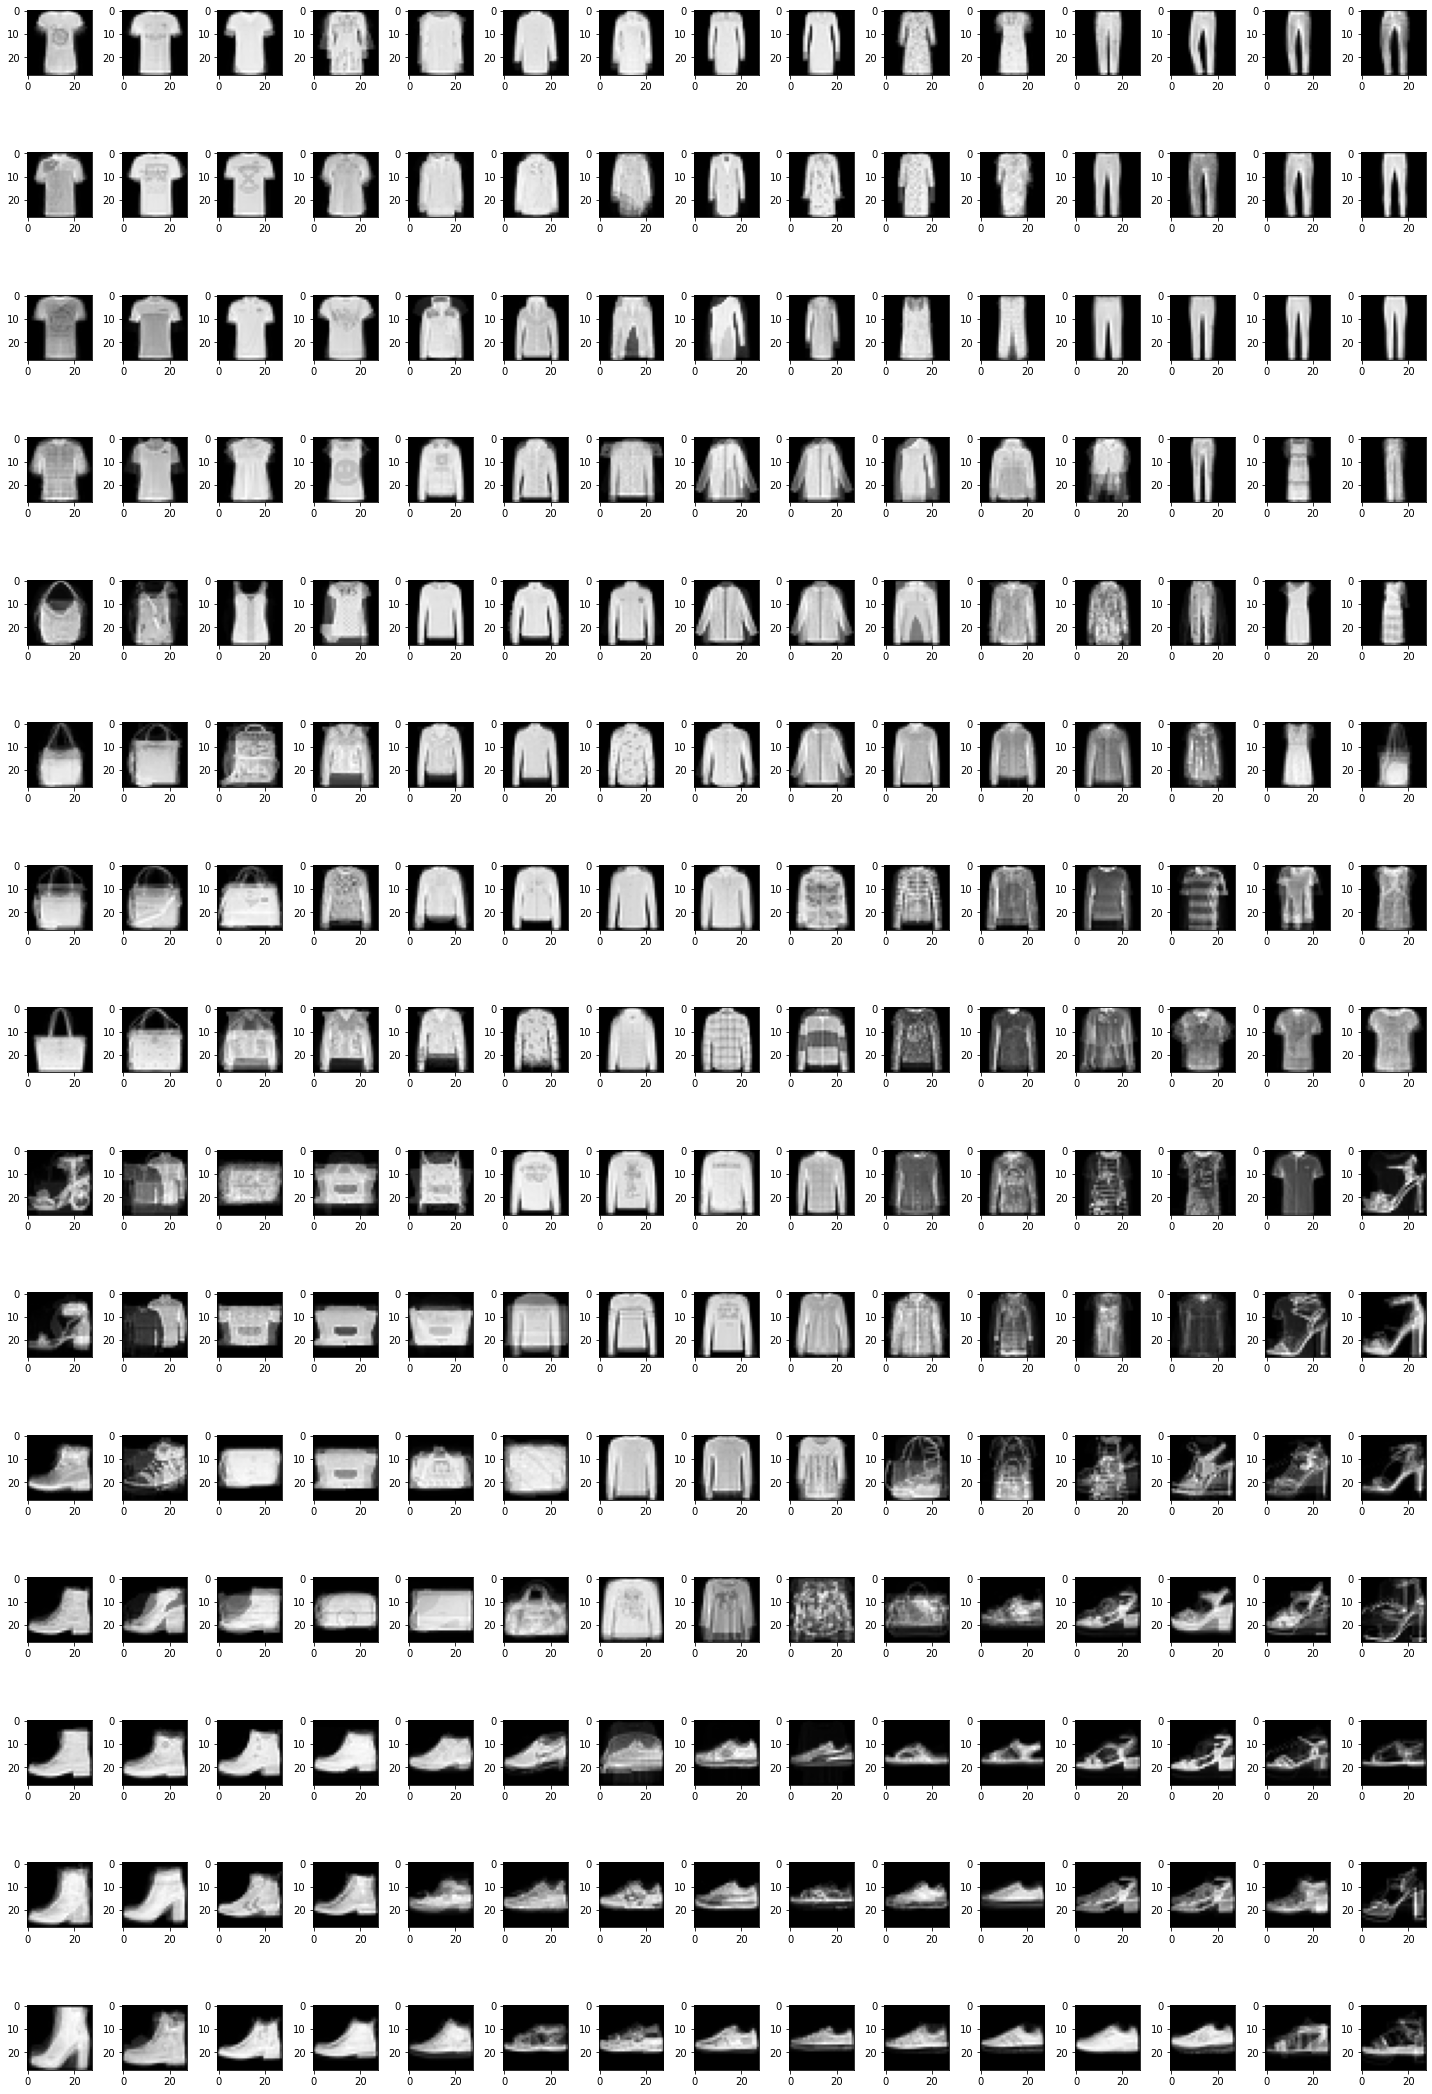

In [251]:
Plott(w_list_2[3])